In [29]:
'''
Data 201
Group Project: Aminata Diatta, Annet Isa, Joshua Shleifer.
Project 3
'''

'\nData 201\nGroup Project: Aminata Diatta, Annet Isa, Joshua Shleifer.\nProject 3\n'

#**Introduction**

In this project, we explored Decision Trees using the same dataset from Project 2 - the age prediction subset from the 2013-2014 NHANES dataset.

From the dataset page at the UC Irvine Machine Learning Repositry page:

"The National Health and Nutrition Examination Survey (NHANES), administered by the Centers for Disease Control and Prevention (CDC), collects extensive health and nutritional information from a diverse U.S. population. Though expansive, the dataset is often too broad for specific analytical purposes. In this sub-dataset, we narrow our focus to predicting respondents' age by extracting a subset of features from the larger NHANES dataset. These selected features include physiological measurements, lifestyle choices, and biochemical markers, which were hypothesized to have strong correlations with age."
https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset

There are 10 columns, 2,278 rows.

Raw csv file: https://drive.google.com/file/d/1V87ry830Y9dNKjSvq-u-43C173PhRgrU/view?usp=drive_link


dataframe for EDA: df

pandas dataframe for Linear Regression: nhanes_data





#Data Preparation and Wrangling






In [30]:
pip install ucimlrepo

In [31]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
nhanes_data = fetch_ucirepo(id=887)

# data (as pandas dataframes)
X = nhanes_data.data.features
y = nhanes_data.targets


# metadata
print(nhanes_data.metadata)

# variable information
print(nhanes_data.variables)


{'uci_id': 887, 'name': 'National Health and Nutrition Health Survey 2013-2014 (NHANES) Age Prediction Subset', 'repository_url': 'https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset', 'data_url': 'https://archive.ics.uci.edu/static/public/887/data.csv', 'abstract': "The National Health and Nutrition Examination Survey (NHANES), administered by the Centers for Disease Control and Prevention (CDC), collects extensive health and nutritional information from a diverse U.S. population. Though expansive, the dataset is often too broad for specific analytical purposes. In this sub-dataset, we narrow our focus to predicting respondents' age by extracting a subset of features from the larger NHANES dataset. These selected features include physiological measurements, lifestyle choices, and biochemical markers, which were hypothesized to have strong correlations with age.", 'area': 'Health and Medicine', 'tasks': ['Classifi

In [32]:
# importing the raw data to create a dataframe for EDA

import numpy as np
import pandas as pd

df = pd.read_csv("NHANES_age_prediction.csv")

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB
None
      SEQN age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  \
0  73564.0     Adult      61.0       2.0     2.0    35.7   110.0     2.0   
1  73568.0     Adult      26.0       2.0     2.0    20.3    89.0     2.0   
2  73576.0     Adult      16.0       1.0     2.0    23.2    89.0     2.0   
3  73577.0     Adult      32.0       1.0     2.0  

In [33]:
df.rename(columns={'RIDAGEYR': 'AGE', 'RIAGENDR': 'GENDER', 'PAQ605': 'PHYSICAL ACTIVITIES', 'BMXBMI' : 'BODY MASS INDEX', 'LBXGLU' : 'BLOOD GLUCOSE AFTER FASTING', 'DIQ010' : 'DIABETIC?', 'LBXGLT': 'ORAL', 'LBXIN' : 'BLOOD INSULIN LEVEL'}, inplace=True)
print("\nRenamed DataFrame (Specific Columns):")
print(df)


Renamed DataFrame (Specific Columns):
         SEQN age_group   AGE  GENDER  PHYSICAL ACTIVITIES  BODY MASS INDEX  \
0     73564.0     Adult  61.0     2.0                  2.0             35.7   
1     73568.0     Adult  26.0     2.0                  2.0             20.3   
2     73576.0     Adult  16.0     1.0                  2.0             23.2   
3     73577.0     Adult  32.0     1.0                  2.0             28.9   
4     73580.0     Adult  38.0     2.0                  1.0             35.9   
...       ...       ...   ...     ...                  ...              ...   
2273  83711.0     Adult  38.0     2.0                  2.0             33.5   
2274  83712.0     Adult  61.0     1.0                  2.0             30.0   
2275  83713.0     Adult  34.0     1.0                  2.0             23.7   
2276  83718.0     Adult  60.0     2.0                  2.0             27.4   
2277  83727.0     Adult  26.0     1.0                  2.0             24.5   

      BLOOD 

In [34]:
# additional context for specific columns
df['gender_copy'] = df['GENDER'].copy()
df['gender_copy'] = df['gender_copy'].replace({1.0: 'M', 2.0: 'F'})

df['diabetes_copy'] = df['DIABETIC?'].copy()
df['diabetes_copy'] = df['diabetes_copy'].replace({1.0: 'Yes', 2.0: 'No', 3.0: 'Borderline'})

df['work_activity_copy'] = df['PHYSICAL ACTIVITIES'].copy()
df['work_activity_copy'] = df['work_activity_copy'].replace({1.0: 'YES', 2.0: 'NO'})

df.head(10)


,SEQN,age_group,AGE,GENDER,PHYSICAL ACTIVITIES,BODY MASS INDEX,BLOOD GLUCOSE AFTER FASTING,DIABETIC?,ORAL,BLOOD INSULIN LEVEL,gender_copy,diabetes_copy,work_activity_copy
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,F,No,NO
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,F,No,NO
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,M,No,NO
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15,M,No,NO
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,F,No,YES
5,73581.0,Adult,50.0,1.0,2.0,23.6,110.0,2.0,100.0,6.08,M,No,NO
6,73587.0,Adult,14.0,1.0,2.0,38.7,94.0,2.0,202.0,21.11,M,No,NO
7,73596.0,Adult,57.0,2.0,2.0,38.3,107.0,2.0,164.0,20.93,F,No,NO
8,73607.0,Senior,75.0,1.0,2.0,38.9,89.0,2.0,113.0,17.47,M,No,NO
9,73610.0,Adult,43.0,1.0,1.0,28.9,90.0,2.0,95.0,3.24,M,No,YES


#EDA Visualisation Redux

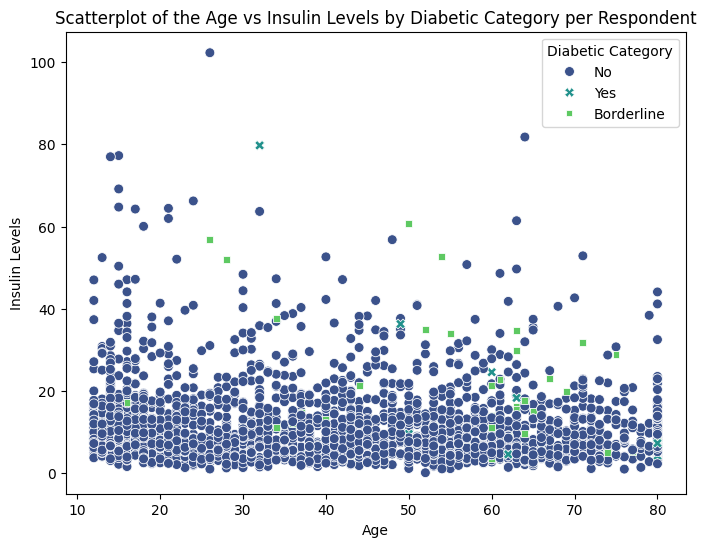

In [35]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plotting glucose levels vs. insulin levels
data = df


# scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data,
    x='AGE',
    y='BLOOD INSULIN LEVEL',
    hue='diabetes_copy',
    palette='viridis',
    style='diabetes_copy',
    s=50
    )

# labels and title
plt.title('Scatterplot of the Age vs Insulin Levels by Diabetic Category per Respondent')
plt.xlabel('Age')
plt.ylabel('Insulin Levels')

# enjoy the show!
plt.legend(title='Diabetic Category')
plt.show()

This visualization is copied from Project 2.

The data is very well distributed across ages! Though borderline cases are spread throughout the scatterplot, most diabetic cases shown are in the 40+ age group. There is a suggestion of an inverse correleation between high insulin levels and age but more analysis would be needed.

#scikit-learn DecisionTree Classification


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

df = pd.read_csv("NHANES_age_prediction.csv")
df.rename(columns={'RIDAGEYR': 'AGE', 'RIAGENDR': 'GENDER', 'PAQ605': 'PHYSICAL ACTIVITIES', 'BMXBMI' : 'BODY MASS INDEX', 'LBXGLU' : 'BLOOD GLUCOSE AFTER FASTING', 'DIQ010' : 'DIABETIC?', 'LBXGLT': 'ORAL', 'LBXIN' : 'BLOOD INSULIN LEVEL'}, inplace=True)


X = df[['BODY MASS INDEX', 'BLOOD INSULIN LEVEL', 'BLOOD GLUCOSE AFTER FASTING', 'PHYSICAL ACTIVITIES']]
y = df['age_group']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)


# Initialize the Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
y_prob = tree.predict_proba(X_test)


# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8377192982456141


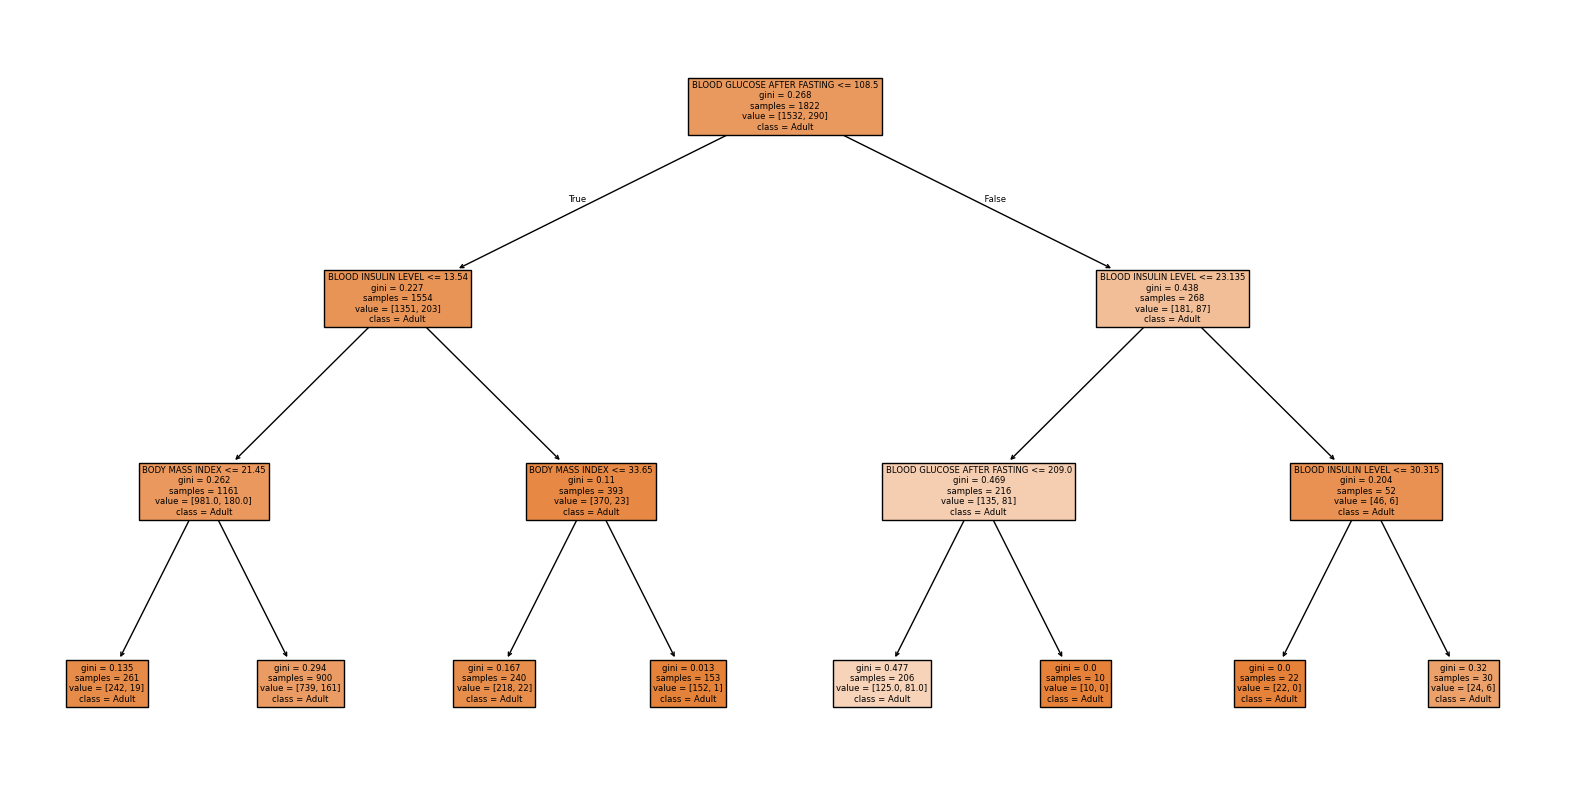

In [37]:
# prompt: display the above tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'tree' is your trained DecisionTreeClassifier from the previous code
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=['BODY MASS INDEX', 'BLOOD INSULIN LEVEL', 'BLOOD GLUCOSE AFTER FASTING', 'PHYSICAL ACTIVITIES'], class_names=tree.classes_)
plt.show()

## INTERPRETATION

If the first statement is true (LBXGLT ≤ 138.5):
When the oral glucose test (LBXGLT) value is 138.5 or lower, the decision tree splits further to refine the classification. The next question asks if LBXGLT is 96.5 or lower. If it is, the model evaluates the Body Mass Index (BMXBMI). If the BMI is 23.45 or lower, the majority of individuals fall under the "Adult" category with a high degree of confidence (gini = 0.06). If the BMI is greater than 23.45, most individuals are still classified as "Adult," but the confidence decreases slightly (gini = 0.146). On the other hand, if LBXGLT is higher than 96.5 but still within the initial range of 138.5 or lower, the decision tree considers blood insulin levels (LBXIN). If the insulin level is 8.685 or lower, the model classifies most individuals as "Adult" (gini = 0.37). However, if the insulin level exceeds 8.685, the majority are still classified as "Adult," though with higher confidence (gini = 0.168).

If the first statement is false (LBXGLT > 138.5):
If the oral glucose test value is greater than 138.5, the decision tree takes a different path and evaluates the Body Mass Index (BMXBMI). If the BMI is 33.75 or lower, the model further considers LBXGLT again. If LBXGLT is 164.5 or lower, individuals are classified as "Adult," though with less confidence (gini = 0.438). If LBXGLT exceeds 164.5, the classification remains "Adult" but confidence drops further (gini = 0.5). If the BMI is greater than 33.75, the decision tree focuses on blood insulin levels (LBXIN). If the insulin level is 14.465 or lower, individuals are categorized as "Adult" with moderate confidence (gini = 0.263). However, if the insulin level exceeds 14.465, the classification remains "Adult" but with a much higher confidence level (gini = 0.161). These paths show how glucose levels, BMI, and insulin collectively guide the classification process.

#scikit-learn Decision Tree Classification Redux

What if rather than just Adult/Senior, we grouped respondents in six age ranges?

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

df = pd.read_csv("NHANES_age_prediction.csv")
df.rename(columns={'RIDAGEYR': 'AGE', 'RIAGENDR': 'GENDER', 'PAQ605': 'PHYSICAL ACTIVITIES', 'BMXBMI' : 'BODY MASS INDEX', 'LBXGLU' : 'BLOOD GLUCOSE AFTER FASTING', 'DIQ010' : 'DIABETIC?', 'LBXGLT': 'ORAL', 'LBXIN' : 'BLOOD INSULIN LEVEL'}, inplace=True)

df['age_group'] = pd.cut(df['AGE'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'], include_lowest=True)


X = df[['BODY MASS INDEX', 'BLOOD INSULIN LEVEL', 'BLOOD GLUCOSE AFTER FASTING', 'PHYSICAL ACTIVITIES']]
y = df['age_group']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)


# Initialize the Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
y_prob = tree.predict_proba(X_test)


# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.3530701754385965


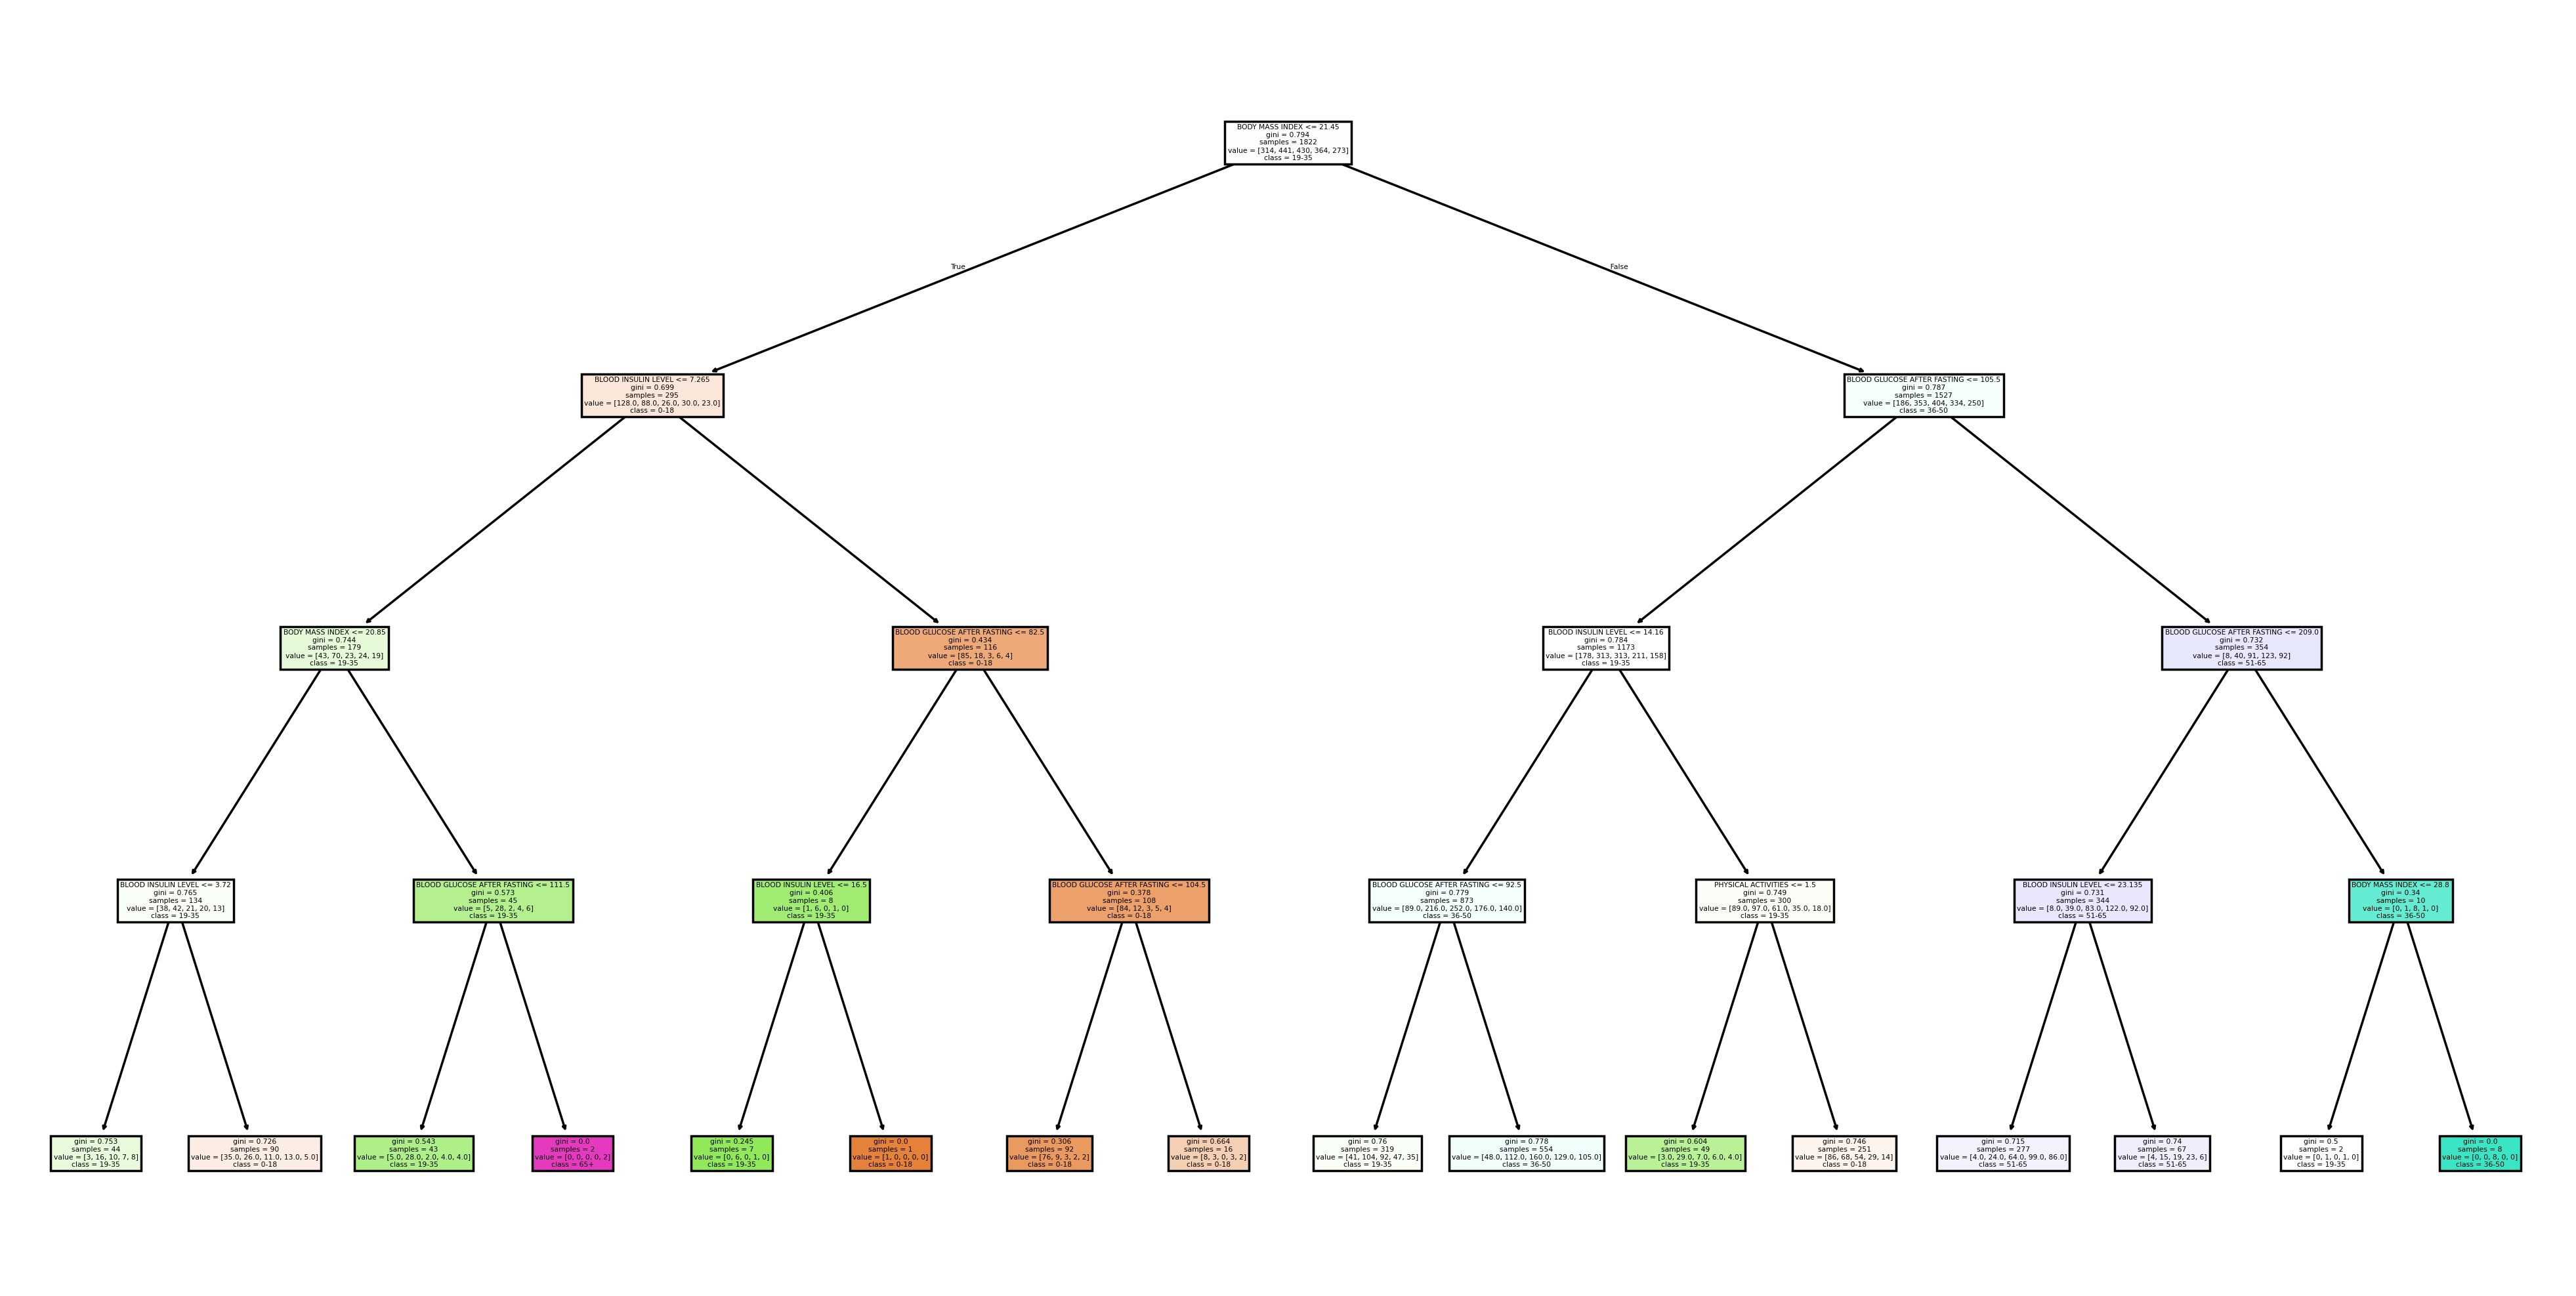

In [54]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'tree' is your trained DecisionTreeClassifier from the previous code
plt.figure(figsize=(20,10), dpi = 250)
plot_tree(tree, filled=True, feature_names=['BODY MASS INDEX', 'BLOOD INSULIN LEVEL', 'BLOOD GLUCOSE AFTER FASTING', 'PHYSICAL ACTIVITIES'], class_names=tree.classes_)
plt.show()

##Interpretation Redux

Yikes. The accuracy score is now 0.3004 and the DecisionTree plot is very hard to read. For this dataset, trying to predict which age group each individual is instead of just senior/not did not work nearly as well. It makes sense that it performs worse, because by nature predicting from fewer bins is easier (especially as they're subsets of the previously used ones), but this result gives us a model that is not very accurate. It is interesting to note that the predictions are clustered around the predicted age range (e. g. a leaf predicted at 19-35 has very few seniors).